<a href="https://colab.research.google.com/github/06-preetinder/ai-waste-classification/blob/main/2_model_testing_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/ai-project/dataset.zip'
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
import shutil
shutil.rmtree('/content/dataset/trash')


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

input_folder = '/content/dataset'
output_folder = '/content/split_dataset'

splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=42,
    ratio=(0.8, 0.1, 0.1),
    move=True
)

Copying files: 2390 files [00:00, 19096.58 files/s]


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load model
model = load_model('/content/drive/MyDrive/ai-project/waste_classification_model.h5')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/split_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate model
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"❌ Test Loss: {test_loss:.4f}")

Found 242 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 861ms/step - accuracy: 0.7526 - loss: 0.6690
✅ Test Accuracy: 0.7727
❌ Test Loss: 0.6178


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


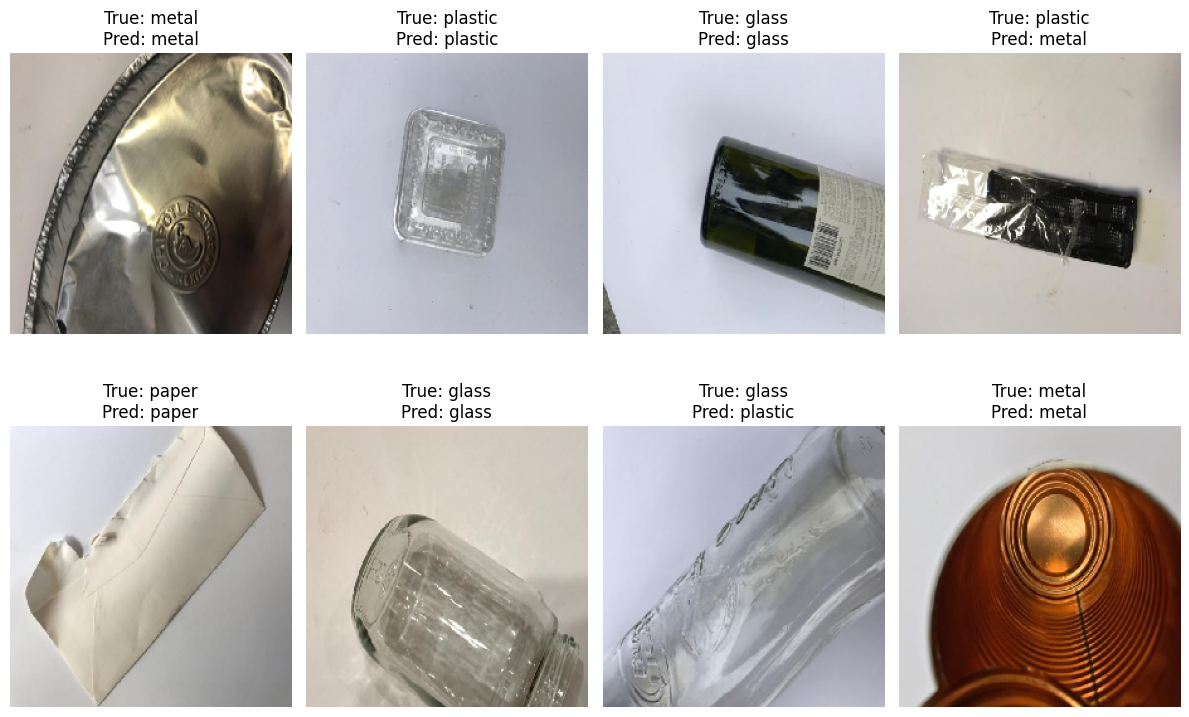

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get class names
class_names = list(test_generator.class_indices.keys())

# Take a batch from test set
images, labels = next(test_generator)
predictions = model.predict(images)

# Convert predictions and labels to indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# Plot first 8 images
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


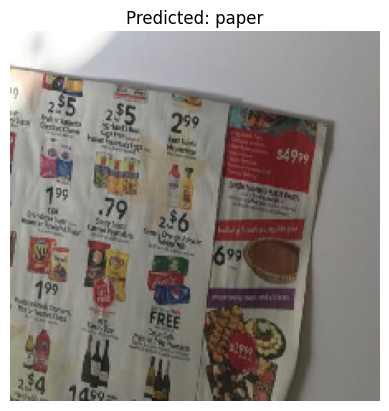

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


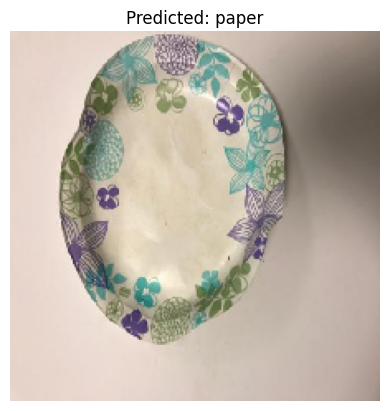

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


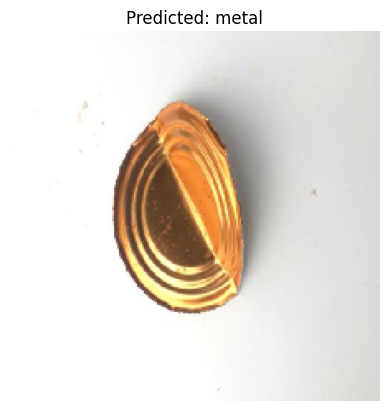

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


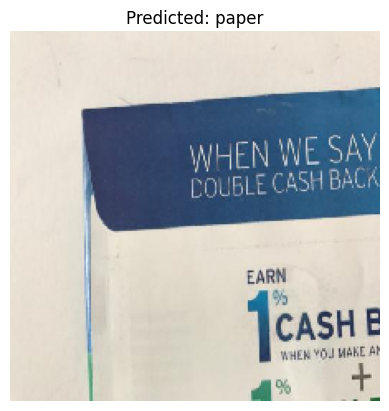

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


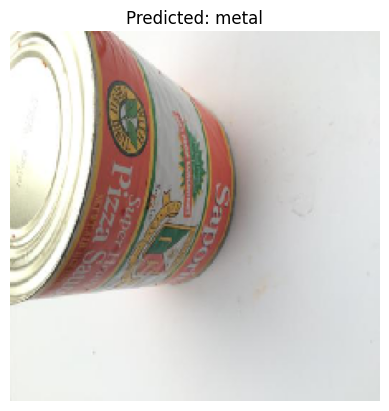

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


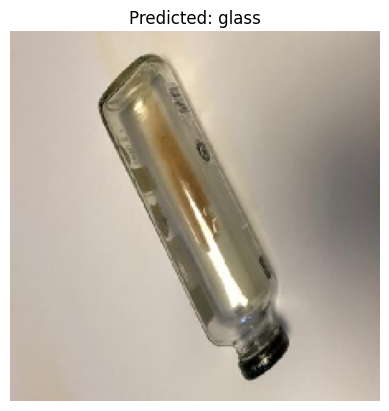

In [ ]:
from tensorflow.keras.preprocessing import image
import os

real_image_path = "/content/drive/MyDrive/ai-project/test_images"

for fname in os.listdir(real_image_path):
    if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(real_image_path, fname)

        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]

        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis('off')
        plt.show()